In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from scipy import stats
from scipy.stats import f_oneway
import statsmodels.formula.api as smf
import ast
from datetime import datetime

import dash
from dash import dcc, html
from dash.dependencies import Input, Output

data_path = './data/'
cmu_character = pd.read_csv(data_path+'cmu_character.csv')
cmu_movies = pd.read_csv(data_path+'cmu_movies.csv')

ethnicity_map = pd.read_table(data_path+'ethnicities_data.tsv', sep='\t', index_col=0).to_dict()['Ethnicities']
cmu_character['actor_ethnicity'] = cmu_character['actor_ethnicity'].map(ethnicity_map)
ethnicity_map = pd.read_table(data_path+'ethnicity_group_data.tsv', sep='\t', index_col=0).to_dict()['Ethnic Group']
cmu_character['actor_ethnicity'] = cmu_character['actor_ethnicity'].map(ethnicity_map)

cmu_movies['genre'] = cmu_movies['genre'].apply(lambda x: eval(x))

In [2]:
cmu_movies

,wikiID,freebase_movID,movie_name,release_date,boxoffice,runtime,language,country,genre,tconst,averageRating,numVotes
0,975900,/m/03vyhn,ghosts of mars,2001-08-24,14010832.0,98.0,['English Language'],['United States of America'],"[Thriller, Science Fiction, Horror, Adventure,...",tt0228333,4.9,56928
1,28463795,/m/0crgdbh,brun bitter,1988-01-01,NaN,83.0,['Norwegian Language'],['Norway'],"[Crime Fiction, Drama]",tt0094806,5.6,41
2,9363483,/m/0285_cd,white of the eye,1987-01-01,NaN,110.0,['English Language'],['United Kingdom'],"[Thriller, Erotic thriller, Psychological thri...",tt0094320,6.1,2895
3,261236,/m/01mrr1,a woman in flames,1983-01-01,NaN,106.0,['German Language'],['Germany'],[Drama],tt0083949,5.9,623
4,10408933,/m/02qc0j7,alexander's ragtime band,1938-08-16,3600000.0,106.0,['English Language'],['United States of America'],"[Musical, Comedy, Black-and-white]",tt0029852,6.8,2268
...,...,...,...,...,...,...,...,...,...,...,...,...
49468,15394941,/m/03m6zh4,gopi kishan,1994-12-02,NaN,NaN,['Hindi Language'],['India'],"[Drama, Action, Crime, Comedy]",tt0109922,5.8,964
49469,23851782,/m/06_vb43,the ghost train,1941-05-03,NaN,82.0,['English Language'],['United Kingdom'],"[Crime Fiction, Thriller, Comedy, Supernatural]",tt0033660,6.2,1582
49470,35228177,/m/0j7hxnt,mermaids: the body found,2011-03-19,NaN,120.0,['English Language'],['United States of America'],[Drama],tt1816585,4.6,1711
49471,34980460,/m/0g4pl34,knuckle,2011-01-21,NaN,96.0,['English Language'],"['Ireland', 'United Kingdom']","[Biographical film, Drama, Documentary]",tt1606259,6.8,3194


In [3]:
cmu_character

,wikiID,freebase_movID,character_name,actor_birth,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_at_release,freebase_char_actor_map,freebase_charID,freebase_actorID,release_date,is_principal,persona,fameScore_before,fameScore,fameScore_diff
0,975900,/m/03vyhn,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001-08-24,0.0,NaN,6.372449,8.106199,1.733750
1,975900,/m/03vyhn,Lieutenant Melanie Ballard,1974-08-15,F,1.780,NaN,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001-08-24,0.0,35.0,8.160665,8.539092,0.378426
2,975900,/m/03vyhn,Desolation Williams,1969-06-15,M,1.727,NaN,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001-08-24,1.0,NaN,12.718112,12.823112,0.105000
3,975900,/m/03vyhn,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001-08-24,1.0,NaN,52.188147,42.608382,-9.579765
4,975900,/m/03vyhn,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001-08-24,0.0,NaN,11.283701,11.308818,0.025117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331131,9971909,/m/02pygw1,NaN,1938-11-26,M,NaN,NaN,Rich Little,33.0,/m/02vbk4r,NaN,/m/03m6t5,1972-09-22,1.0,NaN,1.347431,1.239172,-0.108259
331132,9971909,/m/02pygw1,NaN,1918-10-02,M,NaN,NaN,Herb Voland,53.0,/m/0ggdv2_,NaN,/m/02qylb9,1972-09-22,1.0,NaN,4.172349,2.597401,-1.574948
331133,28308153,/m/0cp05t9,NaN,1941-11-18,M,1.730,NaN,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44,1957-01-01,1.0,NaN,0.000000,0.802080,0.802080
331134,28308153,/m/0cp05t9,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm,1957-01-01,0.0,NaN,0.000000,0.668400,0.668400


In [4]:
def get_genre_diversity(df):
    '''
    This function returns the number of different past different genres assigned to movies an actor 
    played in before.
    '''
    df = df.sort_values('release_date')
    return pd.DataFrame({'wikiID':df['wikiID'].values,
                         'genre_diversity':[len(np.unique(np.hstack(df.iloc[:i+1]['genre'].values)))
                                            for i in range(df.shape[0])],
                         'movie_diversity':[i+1 for i in range(df.shape[0])]})

# compute a dataframe with actor informations for each film with fame and number of past genres
actor_genres = cmu_character[['wikiID','actor_name','freebase_actorID','fameScore','release_date']] \
                            .merge(cmu_movies[['wikiID','genre']])

actor_genres['genre'] = actor_genres['genre'].apply(lambda x : x[:3]) #keep only the 3 main genres

actor_genres = actor_genres.merge(actor_genres.groupby('freebase_actorID').apply(get_genre_diversity)\
                                                                          .reset_index(level=0),
                                  on=['freebase_actorID','wikiID'])
actor_genres.sample(5)
                         

,wikiID,actor_name,freebase_actorID,fameScore,release_date,genre,genre_diversity,movie_diversity
212534,2987094,Xzibit,/m/01vw917,11.338066,2005-11-11,"[Thriller, Crime Thriller, Drama]",11,5
151785,15290178,Jeffrey Combs,/m/02jm9c,3.984757,2007-01-01,"[Horror, Slasher]",23,23
183147,957792,Sean Hayes,/m/033jj1,6.514769,2001-07-04,"[Fantasy Comedy, Fantasy Adventure, Adventure]",11,4
94277,36030580,Jennifer Rubin,/m/08h_q3,4.875663,1994-05-16,"[Thriller, Mystery, Drama]",11,7
212400,1608670,Bill Paxton,/m/01s7zw,13.018426,2001-11-17,"[Thriller, Crime Fiction, Horror]",40,39


In [5]:
actor_genres[actor_genres['freebase_actorID']=='/m/02qhrg'].sort_values('release_date')

,wikiID,actor_name,freebase_actorID,fameScore,release_date,genre,genre_diversity,movie_diversity
22639,14632518,Ramón Novarro,/m/02qhrg,9.930105,1917-08-27,"[Silent film, Drama, Indie]",3,1
72865,16231566,Ramón Novarro,/m/02qhrg,7.409901,1922-09-11,"[Swashbuckler films, Silent film, Black-and-wh...",5,2
269123,25808637,Ramón Novarro,/m/02qhrg,5.484724,1922-10-02,"[Romance Film, Silent film]",6,3
169277,17839626,Ramón Novarro,/m/02qhrg,4.132902,1924-02-04,"[Romance Film, Silent film, Comedy]",7,4
122178,23419399,Ramón Novarro,/m/02qhrg,3.592824,1924-07-21,"[Silent film, Drama, Black-and-white]",7,5
166061,17839776,Ramón Novarro,/m/02qhrg,4.085296,1924-09-08,"[Silent film, Drama, Black-and-white]",7,6
65210,11959704,Ramón Novarro,/m/02qhrg,3.531522,1925-10-04,"[Silent film, Drama, Indie]",7,7
7731,24583584,Ramón Novarro,/m/02qhrg,3.073725,1927-01-01,[Silent film],7,8
172590,4525665,Ramón Novarro,/m/02qhrg,3.887329,1927-09-21,"[Romantic comedy, Silent film, Melodrama]",9,9
212876,10946921,Ramón Novarro,/m/02qhrg,4.163530,1928-04-07,"[Silent film, Melodrama, Drama]",9,10


In [6]:
mean_genre= actor_genres[['fameScore','genre_diversity']].groupby(by=['genre_diversity'],as_index=False).agg(['median','std','count'])
mean_movie= actor_genres[['fameScore','movie_diversity']].groupby(by=['movie_diversity'],as_index=False).agg(['median','std','count'])

In [7]:
fig = px.scatter(x=mean_genre[mean_genre['fameScore']['count']>100].index, 
             y=mean_genre[mean_genre['fameScore']['count']>100]['fameScore']['median'], 
            #  error_y=mean_fame_diversity['fameScore']['std'],
             labels={'y': 'Mean Value'})

# Reshape the figure by updating layout parameters
fig.update_layout(
    width=600,  # Set the width of the figure
    height=400,  # Set the height of the figure
    title='',  # Update the title
    xaxis_title='genre diversity',  # Update the X-axis label
    yaxis_title='median fame score',  # Update the Y-axis label
    margin=dict(l=50, r=50, b=50, t=50),  # Adjust margins if needed
)


fig.show()

In [8]:
fig = px.scatter(x=mean_movie[mean_movie['fameScore']['count']>100].index, 
             y=mean_movie[mean_movie['fameScore']['count']>100]['fameScore']['median'], 
            #  error_y=mean_movie['fameScore']['std'],
             labels={'y': 'Mean Value'})

# Reshape the figure by updating layout parameters
fig.update_layout(
    width=600,  # Set the width of the figure
    height=400,  # Set the height of the figure
    title='',  # Update the title
    xaxis_title='number of movies played',  # Update the X-axis label
    yaxis_title='median fame score',  # Update the Y-axis label
    margin=dict(l=50, r=50, b=50, t=50),  # Adjust margins if needed
)

fig.show()

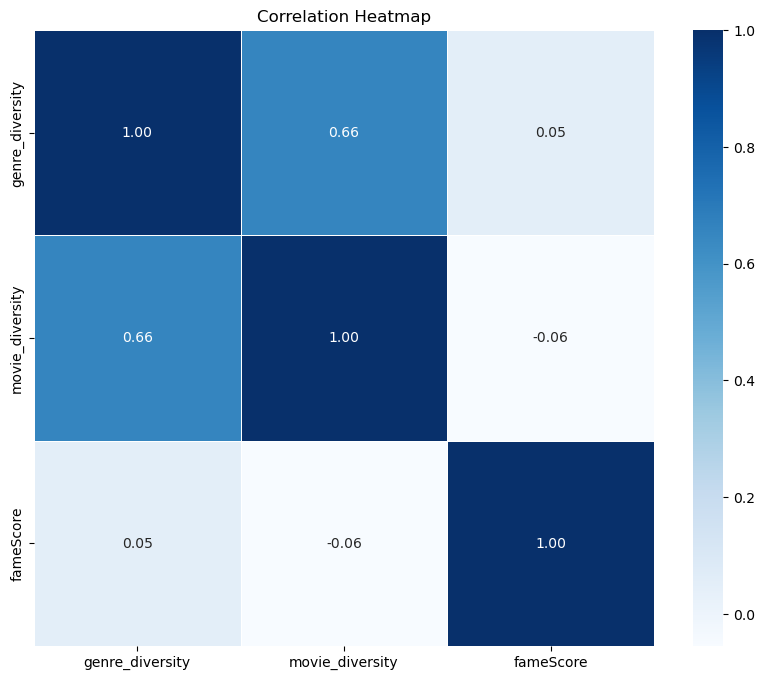

In [9]:
# Calculate the correlation matrix
correlation_matrix = actor_genres[['genre_diversity','movie_diversity','fameScore']]\
                              .corr(method='pearson')

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [41]:
actor_mean_n = actor_genres[['fameScore','movie_diversity','genre_diversity']].groupby(by=['movie_diversity','genre_diversity'],as_index=False).agg(['median','std','count']).reset_index()
actor_mean_n = actor_mean_n[actor_mean_n['fameScore']['count']>10]
actor_mean_n

movie_diversity genre_diversity fameScore                  
                                        median        std  count
0                  1               0  0.675615   0.969764    472
1                  1               1  1.120809   4.839601  15408
2                  1               2  1.601447   5.276773  18434
3                  1               3  3.824430  13.557819  73428
4                  2               0  0.724639   0.180389     11
...              ...             ...       ...        ...    ...
3211              79              19  0.911283   0.534906     12
3238              80              19  0.961628   0.933832     13
3264              81              19  0.985162   1.185203     12
3290              82              19  0.986558   1.372824     12
3314              83              19  0.995867   1.361164     12

[1305 rows x 5 columns]

In [42]:
fig = px.scatter(x=actor_mean_n['genre_diversity'], 
                 y=actor_mean_n['fameScore']['median'], 
                 animation_frame=actor_mean_n['movie_diversity'],
                 range_x=[0,50], range_y=[0,12],
                 #  error_y=mean_fame_diversity['fameScore']['std'],
                 labels={'y': 'Mean Value'})


# Reshape the figure by updating layout parameters
fig.update_layout(
    width=600,  # Set the width of the figure
    height=400,  # Set the height of the figure
    title='',  # Update the title
    xaxis_title='genre diversity',  # Update the X-axis label
    yaxis_title='median fame score',  # Update the Y-axis label
    margin=dict(l=50, r=50, b=50, t=50),  # Adjust margins if needed
)

fig.show()

In [43]:
fig = px.scatter(x=actor_mean_n['movie_diversity'], 
                 y=actor_mean_n['fameScore']['median'], 
                 animation_frame=actor_mean_n['genre_diversity'],
                 range_x=[0,50], range_y=[0,12],
                 #  error_y=mean_fame_diversity['fameScore']['std'],
                 labels={'y': 'Mean Value'})


# Reshape the figure by updating layout parameters
fig.update_layout(
    width=600,  # Set the width of the figure
    height=400,  # Set the height of the figure
    title='',  # Update the title
    xaxis_title='genre diversity',  # Update the X-axis label
    yaxis_title='median fame score',  # Update the Y-axis label
    margin=dict(l=50, r=50, b=50, t=50),  # Adjust margins if needed
)

fig.show()

In [44]:
import statsmodels.api as sm

X = actor_genres[['genre_diversity', 'movie_diversity']]
X = sm.add_constant(X)  # add a constant term to the independent variables
y = actor_genres['fameScore']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              fameScore   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2934.
Date:                Wed, 20 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:17:31   Log-Likelihood:            -1.1803e+06
No. Observations:              331200   AIC:                         2.361e+06
Df Residuals:                  331197   BIC:                         2.361e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.0775      0.021    2